# Sale Method Analysis

- Evaluate the effectiveness of the different sales methods
- Identify strategies to optimize team efforts and maximize revenue
- Provide actional recommendations to enhance sales performance

## 📝 Task List

- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include visualizations showing single variables only to demonstrate the characteristics of data  
  - Include at least one visualization showing two or more variables to represent the relationship between features
  - Describe findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

## Data Overview
**Columns:** The dataset has 8 columns and 15,000 rows. <br>
**Missing Data:** revenue has 1,074 missing values. <br>
**Duplicates:** No duplicate rows were found. <br>
**Data types:** 
- week, nb_sold, years_as_customer, and nb_site_visits are int64 (as expected for numerical data)
- revenue is float64
- sales_method, customer_id, and state are object

## Cleaning data
1. Impute missing revenue values using the mean of the respective sales_method subgroup
2. Negative values in nb_sold were clipped to 0 (though none were found in the dataset)
3. Standardized text data by converting sales_method to lowercase and state names standardized to title case.
4. Verified that all data types remain appropriate to their respective columns (no errors or unexpected values exist.)

In [2]:
import pandas as pd

# Load CSV file into DataFrame
product_sales = pd.read_csv('product_sales.csv')

# Check first few rows of the DataFrame
product_sales.head()

# Summary of the DataFrame
product_sales.shape
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
# Check for missing values
product_sales.isna().sum()

# Check for duplicate rows
product_sales.duplicated().sum()

# Check data types
product_sales.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [4]:
# Check variables under sales_method column
product_sales.groupby('sales_method').count()

# Correct "em + call" to "Email + Call" and "email" to "Email" in the sales_method column
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call', 'Email + Call')
product_sales['sales_method'] = product_sales['sales_method'].replace('email', 'Email')

# Check
product_sales.groupby('sales_method')['customer_id'].count()

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64

In [5]:
# Impute missing revenue values with the mean of the sales_method subgroup
product_sales['revenue'] = product_sales.groupby('sales_method')['revenue'].transform(
    lambda x: x.fillna(x.mean())
)

# Verify that there are no more missing values in the revenue column
product_sales['revenue'].isna().sum()

# Check for outliers in numerical columns (no negative sales allowed and to cap extreme values if necessary)
product_sales['nb_sold'] = product_sales['nb_sold'].clip(lower=0)

# Standardized text columns for consistency
product_sales['sales_method'] = product_sales['sales_method'].str.strip().str.lower()
product_sales['state'] = product_sales['state'].str.strip().str.title()

# Check for issues after cleaning
product_sales.isna().sum()
product_sales.dtypes
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.127684,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.470000,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.550000,6,26,Wisconsin
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.127684,3,25,Indiana
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.490000,0,28,Illinois


## Customer Count by Sales Method
The number of unique customers for each sales method is as follow:<br>
**Call:** 4,962 customers<br>
**Email:** 7,466 customers<br>
**Email + Call:** 2,572 customers<br>

In [6]:
# No. of customers for each sales method
product_sales.groupby('sales_method')['customer_id'].nunique()

sales_method
call            4962
email           7466
email + call    2572
Name: customer_id, dtype: int64

## Revenue Distribution ($)
### Overall
Mean: 95.58<br>
Median: 90.95<br>
Standard Deviation: 47.96<br>
Range: 32.54 to 238.32<br>

### By Sales Method
Call: Lower revenue (47.60 mean) with minimal variability.<br>
Email: Moderate revenue (97.13 mean) with tight clustering.<br>
Email + Call: Highest revenue (183.65 mean), but with more variability.

In [7]:
# Spread of overall revenue distribution
product_sales['revenue'].describe()

# Spread of revenue distribution by sales method
product_sales.groupby('sales_method')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
call,4962.0,47.597467,8.451375,32.54,41.6300,47.597467,52.590,71.36
email,7466.0,97.127684,10.794271,78.83,88.3900,96.835000,104.460,148.97
email + call,2572.0,183.651233,27.037965,122.11,176.4375,183.651233,189.535,238.32


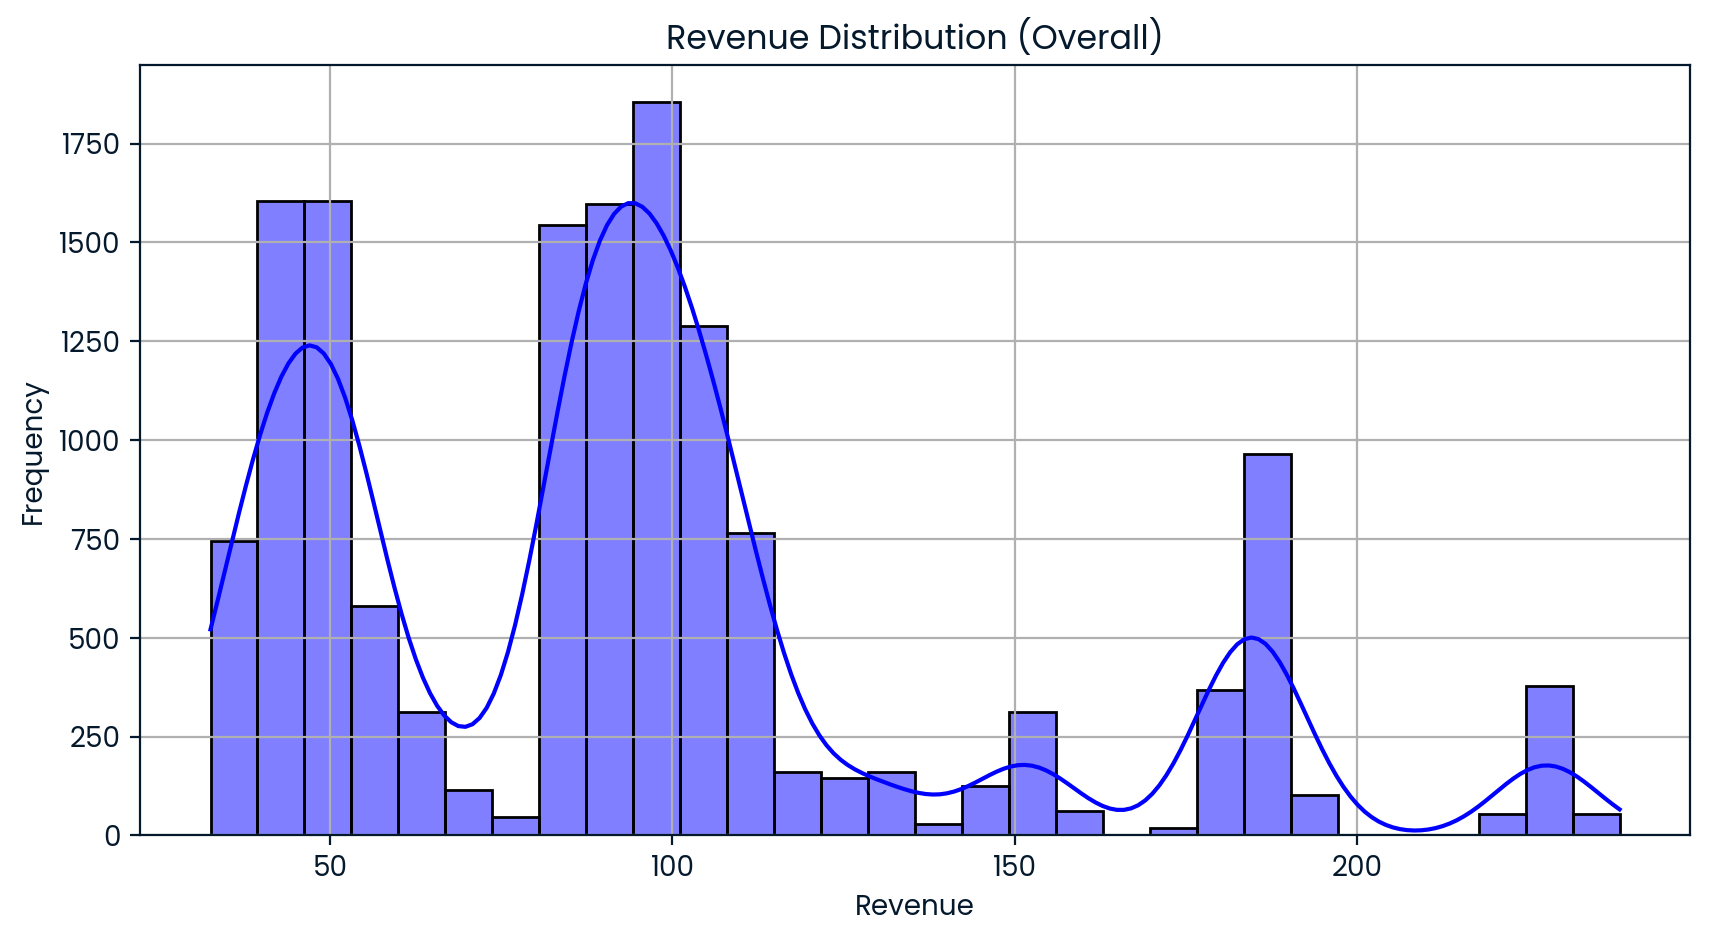

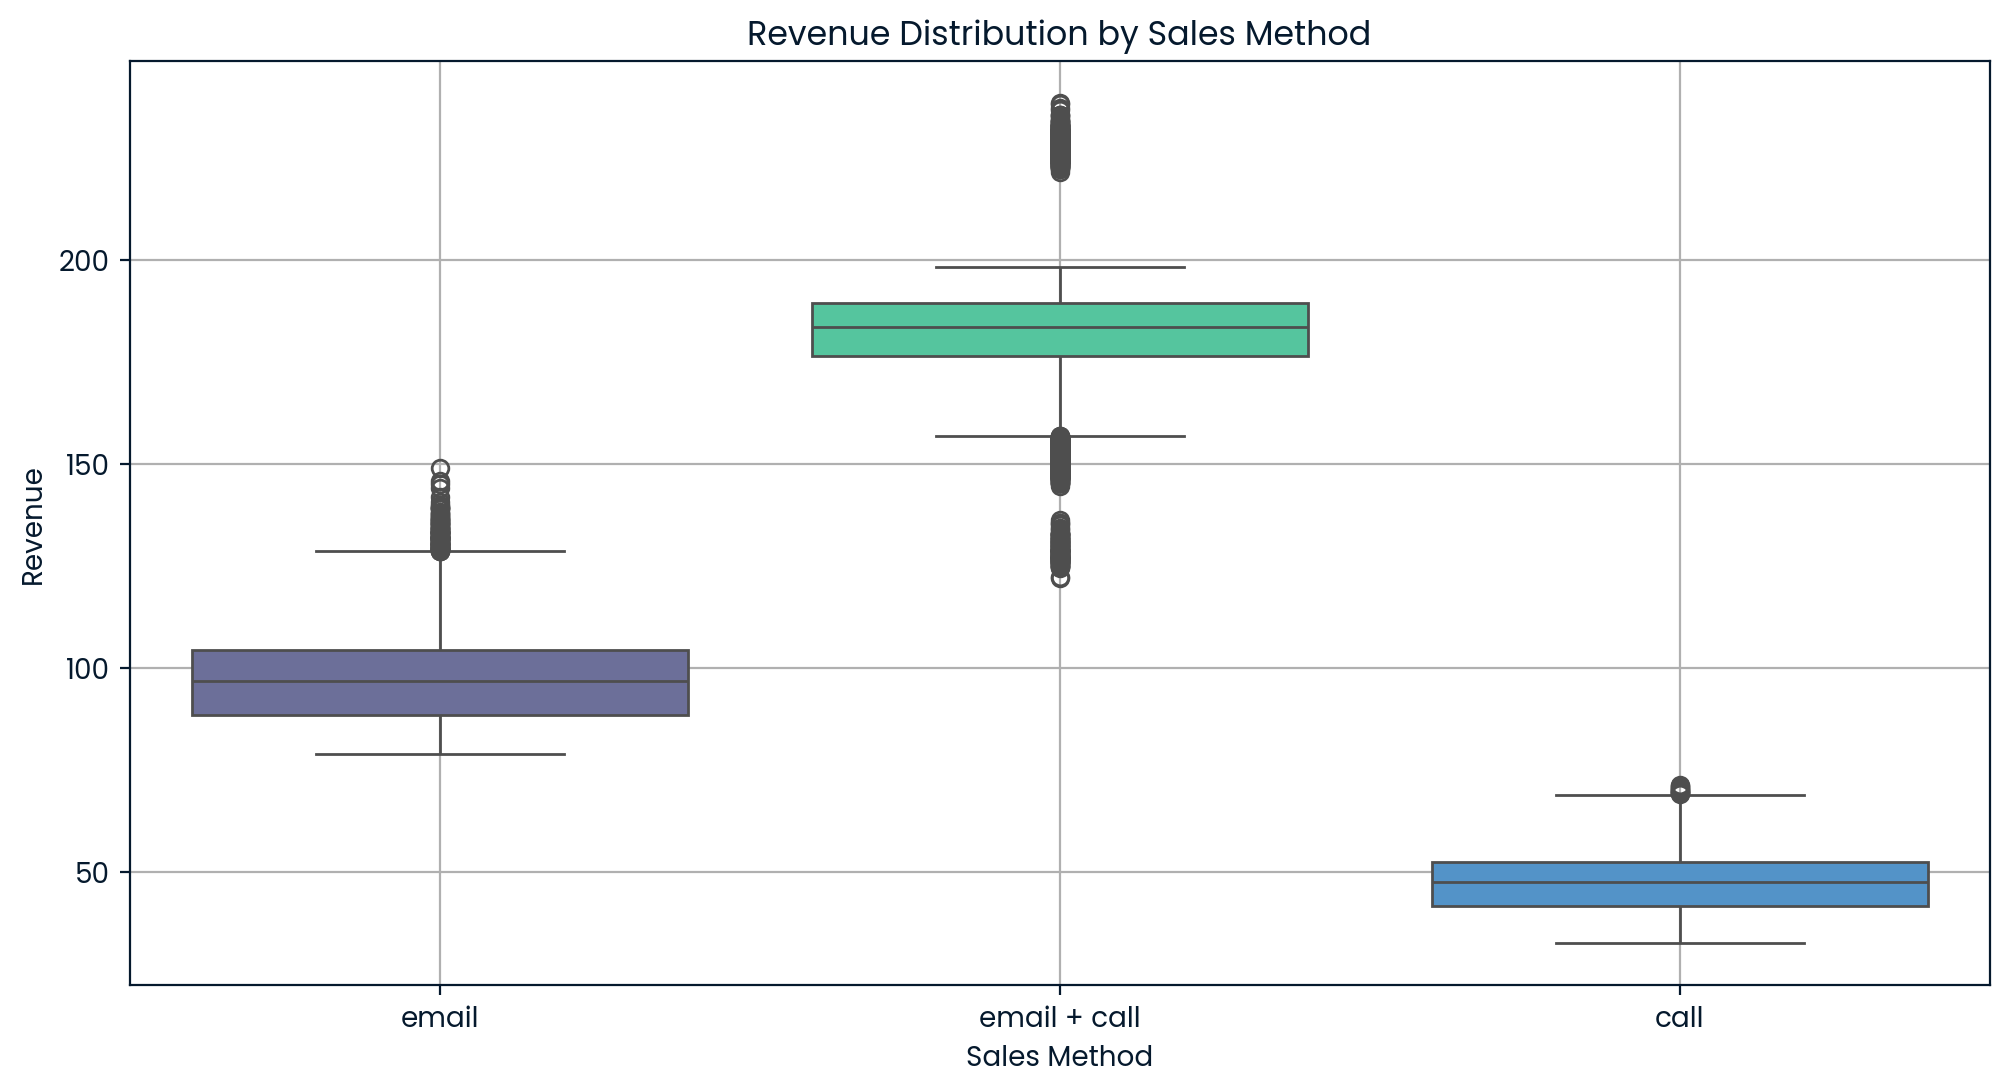

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of overall revenue spread
plt.figure(figsize=(10, 5))
sns.histplot(product_sales['revenue'], kde=True, bins=30, color='blue')
plt.title('Revenue Distribution (Overall)')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization of revenue spread by sales method
plt.figure(figsize=(12, 6))
sns.boxplot(data=product_sales, x='sales_method', y='revenue', hue='sales_method')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### Revenue Over Time
Call: Stable but low revenue over weeks.<br>
Email: Steady revenue trends with slight variations.<br>
Email + Call: Noticeable peaks in certain weeks, correlating with higher efforts and returns.

In [9]:
# Revenue over time for each sales method
revenue_over_time = product_sales.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

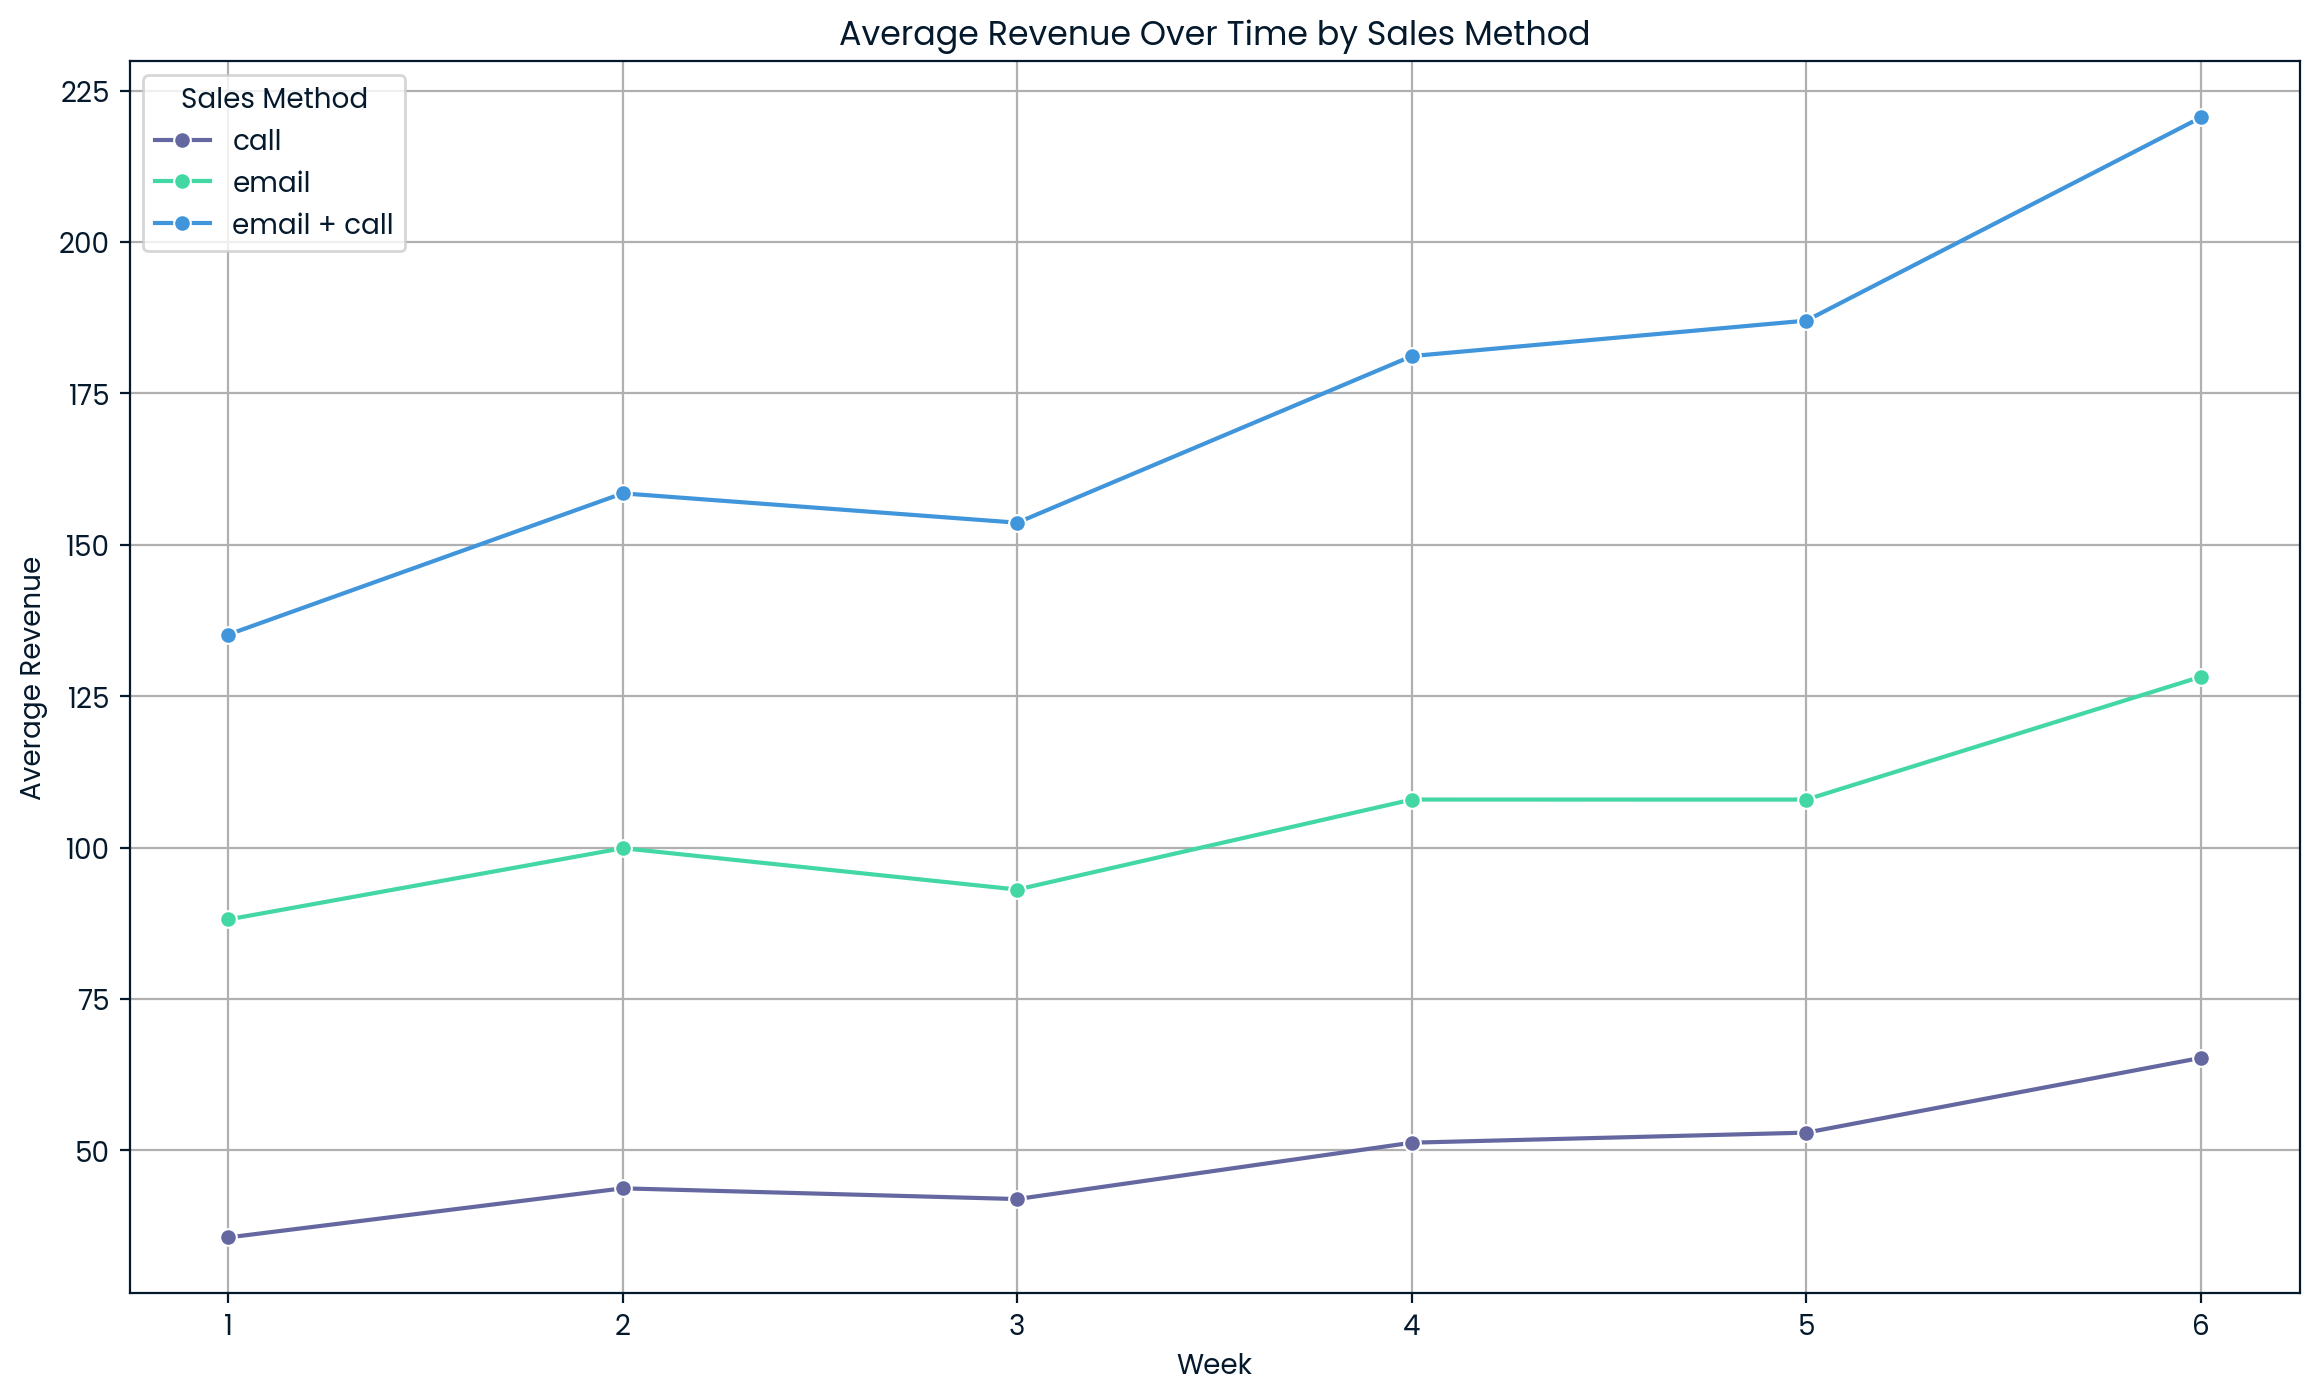

In [10]:
# Visualization of revenue trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=revenue_over_time, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Average Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()

## Sales Method Assessment

Taking into account effort per sales method: Email (0min), Call (30min), Email+Call (10min), An efficiency metric is derived to calculate revenue per minute of effort.

### Email
- Least effort (0 min per customer).
- Moderate average revenue (97.13).
- Ideal for large-scale outreach with minimal resources.

### Call:
- Most effort-intensive (30 mins per customer).
- Lowest revenue (47.60 average, 1.59 per min).
- Least effective and not recommended.

### Email + Call:
- Balanced effort (10 mins per customer).
- Highest revenue (183.65 on average, 18.37 per min).
- Most effective but resource-intensive; use selectively.

## Recommendation
Continue **Email + Call** for high-value customers and rely on **Email** for broader, low-cost outreach.

In [11]:
# Effort per sales method: Email (0 min), Call (30 min), Email + Call (10 min)
effort = {'email': 0, 'call': 30, 'email + call': 10}
product_sales['effort_min'] = product_sales['sales_method'].map(effort)
efficiency = product_sales.groupby('sales_method').apply(
    lambda x: pd.Series({
        'Total Revenue': x['revenue'].sum(),
        'Average Revenue per Customer': x['revenue'].mean(),
        'Revenue per Minute': x['revenue'].sum() / x['effort_min'].sum() if x['effort_min'].sum() > 0 else float('inf')
    })
)

efficiency

,Total Revenue,Average Revenue per Customer,Revenue per Minute
sales_method,,,
call,236178.631537,47.597467,1.586582
email,725155.290202,97.127684,inf
email + call,472350.970166,183.651233,18.365123


## Further insights uncovered

years_as_customers : Long-time customers prefer call (5.18 years) or email+call (4.51 years), indicating engagement with personalized communication.<br>
nb_site_visits: Email+Call drives the most visits (26.77) suggesting increased customer interaction.<br>

In [12]:
product_sales.groupby('sales_method')[['years_as_customer', 'nb_site_visits']].mean()

,years_as_customer,nb_site_visits
sales_method,,
call,5.176743,24.423821
email,4.983793,24.754353
email + call,4.507387,26.771384


## Final Recommendations

1. Optimize Resource Allocation:
- Email + Call:
    - Continue for high-value customers due to its high average revenue and efficiency.<br>
    - Target specific segments where additional interaction yields the most benefit.<br>
- Email:<br>
    - Rely on this method for broader, cost-effective outreach to maximize scalability.<br>
- Call:<br>
    - Discontinue or severely limit use, as it provides the lowest return on investment in terms of both revenue and effort.<br>

2. Monitor Key Metrics:
- Focus on average revenue per customer and revenue per minute for ongoing evaluation of method performance.<br>
- Regularly track site visits and conversion rates to measure engagement driven by each method.<br>
	
3. Future Actions:
- Implement automated workflows for email campaigns to further reduce time costs.<br>
- Pilot test additional touchpoints for high-value customers using hybrid methods like 'Email + Call.'<br>
- Investigate customer preferences and behaviors to refine segmentation strategies.